# Lista de Exercícios 6

Solucionário matemático e computacional de exercícios selecionados da Lista de Exercícios 6.

In [1]:
%matplotlib inline 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Funções-base para resolucão

In [2]:
"""
Implementação do método de Euler
'expr' deve conter variáveis 't' e 'y'. 
Para casos em que são 0, fazer '0*t' 
ou '0*y'.
"""
def met_euler(expr,n,a,b,y0,mov):

    # expressão
    f = eval('lambda t,y:' + expr)

    # malha
    t = np.linspace(a,b,num=n,endpoint=True)

    # passo 
    h = (b-a)/(n-1)
    print('Tamanho do passo: h = {0}'.format(h))
    
    # y(t)
    y = 0*t

    # resolve para frente
    if mov is 'front':
        # cond. inicial
        y[0] = y0

        # esquema
        for i in range(0,n-1):
            y[i+1] = y[i] + h*f(t[i],y[i])

        return t,y
    
    # resolve para trás
    elif mov is 'back':
        
        # cond. inicial
        y[-1] = y0

        # esquema
        for i in range(n-1,0,-1):
            y[i-1] = y[i] - h*f(t[i],y[i])

        return t,y
    
    
def met_pt_medio(expr,n,a,b,y0):
    
    # expressão
    f = eval('lambda t,y:' + expr)

    # malha
    t = np.linspace(a,b,num=n,endpoint=True)

    # passo 
    h = (b-a)/(n-1)
    print('Tamanho do passo: h = {0}'.format(h))
    
    # y(t)
    y = 0*t
    
    # cond. inicial
    y[0] = y0

    # esquema
    for i in range(0,n-1):
        tmed = t[i] + h/2
        ymed = y[i] + h/2*f(t[i],y[i])
        y[i+1] = y[i] + h*f(tmed,ymed)

    return t,y
    


## Soluções da Lista 6

### solucao-L6-Q1a

Tamanho do passo: h = 0.10000000000000003
Tamanho do passo: h = 0.09999999999999998
Aproximação y(0.8) = -0.14851547391331865
Aproximação y(1.6) = 3.042921559591501


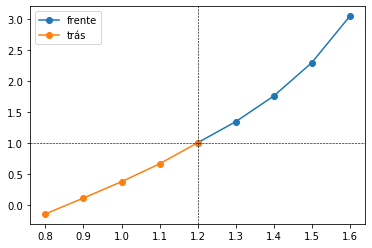

In [3]:
# PVI 
# h = 0.1 => 5 pontos
expr = 'y**2 - t/2 + 3'


# resolve para a frente
y0 = 1
a = 1.2
b = 1.6
n = 5
mov = 'front'
x1,y1 = met_euler(expr,n,a,b,y0,mov)


# resolve para trás
y0 = 1
a = 0.8
b = 1.2
n = 5
mov = 'back'
x2,y2 = met_euler(expr,n,a,b,y0,mov)

# aproximação y(0.8)
print('Aproximação y(0.8) = {0}'.format(y2[0]))

# aproximação y(1.2)
print('Aproximação y(1.6) = {0}'.format(y1[-1]))

# plotagem 
plt.plot(x1,y1,'o-',label='frente')
plt.plot(x2,y2,'o-',label='trás')
plt.axvline(x=1.2,color='k',linewidth=0.6,linestyle='--')
plt.axhline(y=1.0,color='k',linewidth=0.6,linestyle='--')
plt.legend()

### solucao-L6-Q1b

In [4]:
# resolve por ponto médio 
y0 = 1
a = 1.2
b = 1.6
n = 5
xm,ym = met_pt_medio(expr,n,a,b,y0)

# resolve por função residente 
f = eval('lambda t,y:' + expr)
xr = np.linspace(1.2,1.6,num=5,endpoint=True)
yr = odeint(f,1,xr)
yr

Tamanho do passo: h = 0.10000000000000003


array([[1.        ],
       [1.39644385],
       [1.7989217 ],
       [2.20909012],
       [2.62852487]])

### Solução analítica para a EDO do PVI 

Solução analítica:


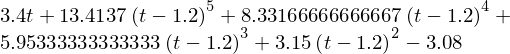

In [5]:
# Encontrando a solução por computação simbólica 
import sympy as sp 
sp.init_printing()

# variável simbólica
tsym = sp.symbols('t')

# função
f = sp.symbols('f', cls=sp.Function)

# EDO
edo = sp.Eq( f(tsym).diff(tsym), f(tsym)**2 - tsym/2 + 3)

# solução 
# lembre que: t0 = 1.2; y0 = 1
sol = sp.dsolve(edo,f(tsym),ics={f(1.2):1})

# usa membro direito e remove big-oh  
sol = sol.rhs.removeO()

# substitui expressão simbólica por numérica
yt = [sol.subs(tsym,i) for i in xr]
yt = np.asarray(yt)

print("Solução analítica:")
sol

### Comparação de soluções

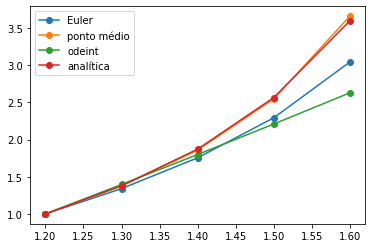

In [6]:
# compara todos os resultados
plt.plot(x1,y1,'o-',label='Euler')
plt.plot(xm,ym,'o-',label='ponto médio')
plt.plot(xr,yr.T[0],'o-',label='odeint')
plt.plot(xr,yt,'o-',label='analítica')
plt.legend();


In [7]:
# variável simbólica
tsym = sp.symbols('t')

# função
f = sp.symbols('f', cls=sp.Function)

# EDO
edo = sp.Eq( f(tsym).diff(tsym) - 4*sp.exp(0.8*tsym) + 0.5*f(tsym),0)

# solução 
sol = sp.dsolve(edo,f(tsym),ics={f(0):2})

# usa membro direito e remove big-oh  
sol = sol.rhs.removeO()

# substitui expressão simbólica por numérica
yt = [sol.subs(tsym,i) for i in xr]
yt = np.asarray(yt)

print("Solução analítica:")
sol

Solução analítica:
